## Explore the data (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, './modules')
from eda_methods import Visualisation
from data import DataProcessing

In [3]:
import scipy.stats as st

In [4]:
!ls -lh modules

total 64
drwxr-xr-x  6 alena  staff   192B Jul 14 16:06 __pycache__
-rw-r--r--  1 alena  staff   2.2K Jul 13 13:17 data.py
-rw-r--r--  1 alena  staff   1.3K Jul 14 16:06 eda_methods.py
-rw-r--r--  1 alena  staff   2.8K Jul 14 13:29 feature_engineering.py
-rw-r--r--  1 alena  staff   541B Jul  7 15:29 helpers.py
-rw-r--r--  1 alena  staff   2.4K Jul 13 11:19 model.py
-rw-r--r--  1 alena  staff   2.8K Jul  5 21:23 model_container.py
-rw-r--r--  1 alena  staff   5.8K Jul 10 10:17 prediction.py


In [5]:
#define input files
train_features_file = 'unzipped_data/data/train_features.csv'
target_file = 'unzipped_data/data/train_salaries.csv'
test_features_file = 'unzipped_data/data/test_features.csv'

#define variables
cat_cols = ['jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
target = 'salary'
id_cols = ['jobId', 'companyId']

In [6]:
data = DataProcessing(train_features_file, target_file, test_features_file, target, id_cols)

In [8]:
data.dataset_info(target_file)


********* Reading in the unzipped_data/data/train_salaries.csv dataset *********

it has 1000000 rows and 2 columns

************************* It has the following columns *************************

Index(['jobId', 'salary'], dtype='object')

********************** Description of quantitative columns**********************

               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000

********************** Description of categorical columns***********************

                   jobId
count            1000000
unique           1000000
top     JOB1362684648725
freq                   1


In [7]:
eda_methods = Visualisation(data)

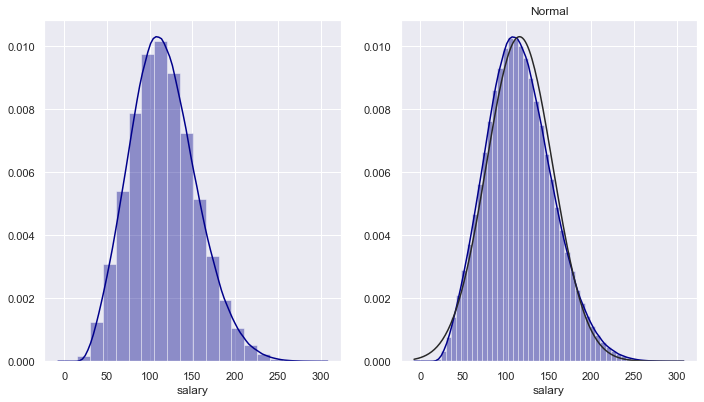

In [9]:
eda_methods.plot_distribution(data.train_df, target)

It is apparent that salary tends to follow a right-skewed distribution.

# Examining Relationships

## JobType and Salary

To explore how the salary is related to the type of job, we need an informative visual display of the data that will compare the eight types of jobs with respect to their salary content. The side-by-side boxplots will allow to compare the distribution of salary counts within each category of the explanatory variable, job type:

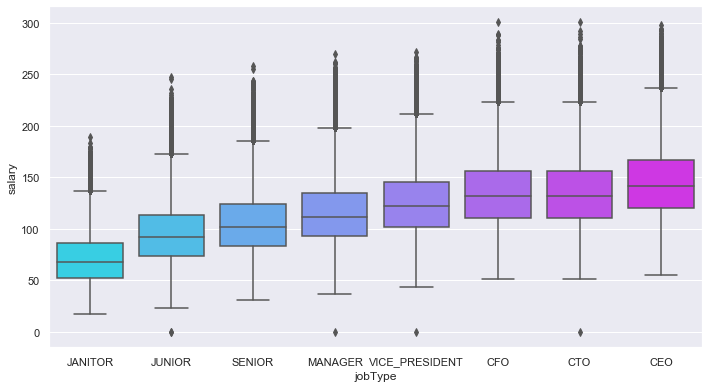

In [8]:
eda_methods.plot_relationships(data.train_df, "jobType", target)

In [11]:
data.train_df.groupby('jobType')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
jobType,,,,,,,,
CEO,124778.0,145.311425,34.423846,55.0,120.0,142.0,167.00,298.0
CFO,124369.0,135.458547,33.069203,51.0,111.0,132.0,156.00,301.0
CTO,125046.0,135.479983,33.093032,0.0,111.0,132.0,156.00,301.0
JANITOR,124971.0,70.813045,24.643021,17.0,52.0,68.0,86.00,189.0
JUNIOR,124594.0,95.331557,29.249018,0.0,74.0,92.0,113.75,248.0
MANAGER,125121.0,115.367596,30.835467,0.0,93.0,112.0,135.00,270.0
SENIOR,125886.0,105.487775,30.069722,31.0,83.0,102.0,124.00,258.0
VICE_PRESIDENT,125235.0,125.367629,31.958131,0.0,102.0,122.0,146.00,272.0


By examining the eight side-by-side boxplots and the numerical summaries, we see at once that JANITOR jobs, as a group, have less salary than others. The median number of salary for JANITOR job (68) is less than the median (and even the first quartile) of either of the other distributions. The spread of the distributions increases, if IQR is considered (JANITOR: 34, JUNIOR: 39, SENIOR: 41, MANAGER: 42, VICE_PRESIDENT: 44, CFO: 45, CTO: 45, CEO: 47), the (full) ranges vary slightly more (JANITOR: 167, CEO: 243). It should be noted, though, that since each of the eight type of jobs shows quite a large spread, simply nowing the job type does not guarantee a knowledge of low or high salary.

## Major and Salary

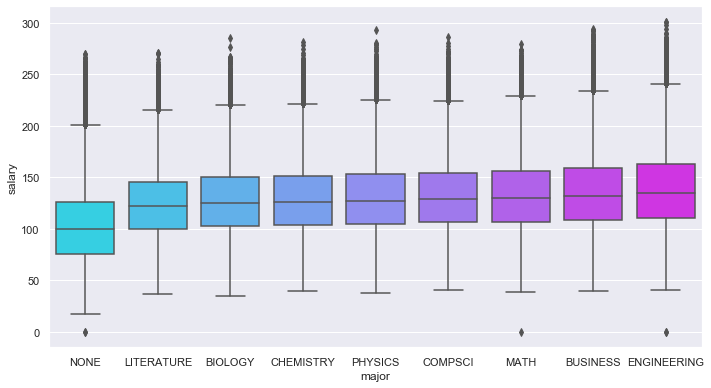

In [9]:
eda_methods.plot_relationships(data.train_df, "major", target)

In [12]:
data.train_df.groupby('major')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
major,,,,,,,,
BIOLOGY,58379.0,127.932664,34.820141,35.0,103.0,125.0,150.0,285.0
BUSINESS,58518.0,135.648980,37.006526,40.0,109.0,132.0,159.0,294.0
CHEMISTRY,58875.0,129.072085,34.832396,40.0,104.0,126.0,151.0,282.0
COMPSCI,58382.0,132.075605,34.776640,41.0,107.0,129.0,154.0,286.0
ENGINEERING,58596.0,138.436617,38.186849,0.0,111.0,135.0,163.0,301.0
LITERATURE,58684.0,124.423097,33.576413,37.0,100.0,122.0,146.0,271.0
MATH,57801.0,133.319735,35.543265,0.0,107.0,130.0,156.0,280.0
NONE,532355.0,102.583479,36.136748,0.0,76.0,100.0,126.0,270.0
PHYSICS,58410.0,130.372436,34.956981,38.0,105.0,127.0,153.0,293.0


By examining the side-by-side boxplots and the numerical summaries, we see at once that NONE major has lower salary than other majors. The median number of NONE major (100) is less than the median of other distributions (median LITERATURE: 122, MATH: 130). NONE IQR is 50 and LITERATURE IQR is 46, but the full ranges not vary a lot. In general NONE major showed worse results and has large variety.

## Degree and Salary

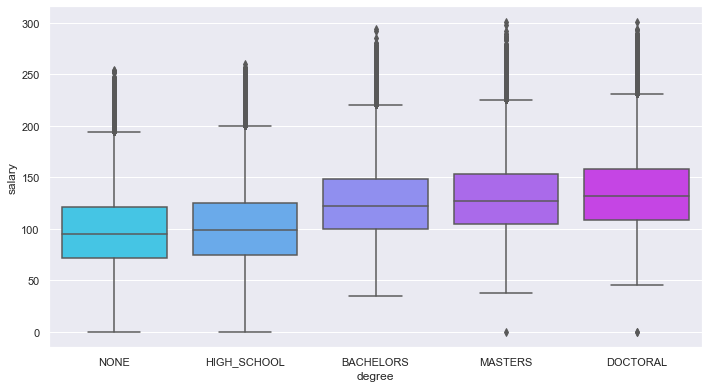

In [10]:
eda_methods.plot_relationships(data.train_df, "degree", target)

In [13]:
data.train_df.groupby('degree')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
degree,,,,,,,,
BACHELORS,175495.0,125.454663,35.042720,35.0,100.0,122.0,148.0,294.0
DOCTORAL,175364.0,135.489433,35.793276,0.0,109.0,132.0,158.0,301.0
HIGH_SCHOOL,236976.0,101.920654,36.113215,0.0,75.0,99.0,125.0,260.0
MASTERS,175311.0,130.504903,35.401101,0.0,105.0,127.0,153.0,301.0
NONE,236854.0,98.176467,34.915650,0.0,72.0,95.0,121.0,254.0


By examining the side-by-side boxplots and the numerical summaries, it can be concluded that NONE and HIGHT_SCHOOL have worse salaries. The median number of NONE and HIGHT_SCHOOL degree (95, 99) is less than the median of other distributions (median BACHELORS: 122, MASTERS: 127, DOCTORAL: 132)

## YearsExperience and Salary

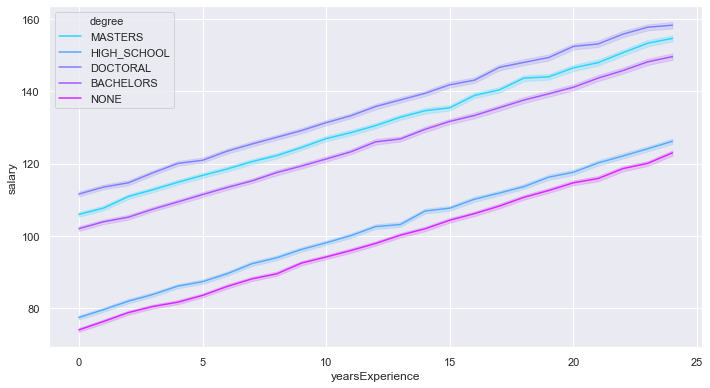

In [11]:
eda_methods.plot_relationships(data.train_df, "yearsExperience", target, hue="degree")

The direction of the relationship is positive. In context, this means that individuals with more years of experience have bigger salary and it's true for all type of degree. The form of the relationship is linear. 

## MilesFromMetropolis and Salary

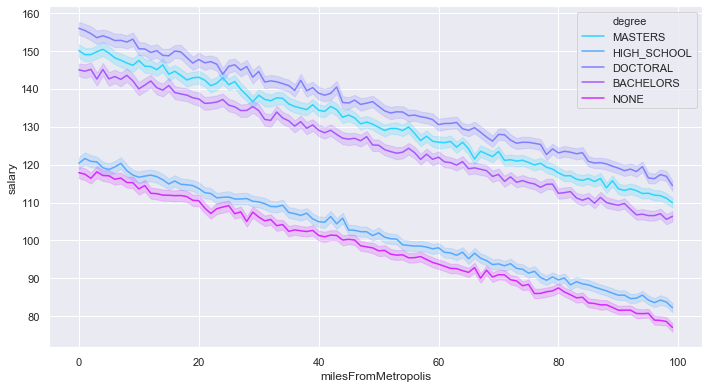

In [12]:
eda_methods.plot_relationships(data.train_df, 'milesFromMetropolis', target, hue='degree')

The direction of the relationship is negative. In context, this means that individuals who work further from Metropolis have lower salary and it's true for all type of degree as well. The form of the relationship is linear.

## JobType and Degree

In [17]:
eda_methods.two_way_table(data.test_train_df, 'jobType', 'degree', margins=True)

degree,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE,Total
jobType,,,,,,
CEO,50003,50298,49708,49755,49955,249719
CFO,49887,49940,49950,50088,49596,249461
CTO,49904,49969,49778,50401,49659,249711
JANITOR,0,0,125129,0,125095,250224
JUNIOR,49583,50074,50280,49922,49757,249616
MANAGER,49758,49776,50055,49970,49953,249512
SENIOR,50394,50182,49902,50249,50361,251088
VICE_PRESIDENT,49903,50230,50429,50162,49945,250669
Total,349432,350469,475231,350547,474321,2000000


The primary goal is to explore how degree is related to jobType. The results suggest that the proportion of jobType for all degree is the same except JANITOR jobType, that have 50% HIGH_SCHOOL degree and 50% NONE degree.